## Dataset Description

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## Data fields

id - Unique ID of each review

sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews

review - Text of the review

In [1]:
import numpy as np
import pandas as pd
import gensim
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
print('Number of examples in Dataset: ', df.shape)
df.head()

Number of examples in Dataset:  (25000, 3)


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
#Details about the columns of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [4]:
#Finding out total number of null values in either columns
df.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

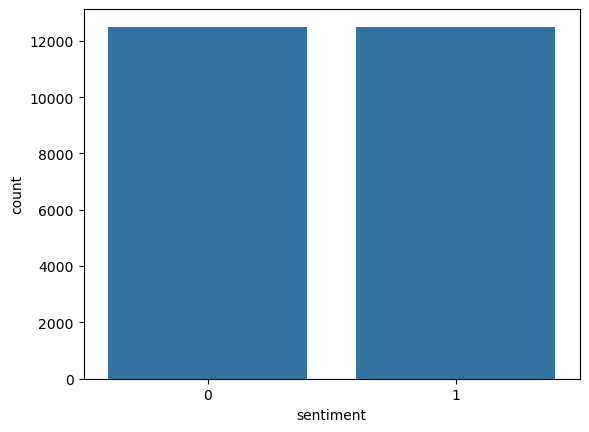

In [5]:
#Composition of Reviews
import seaborn as sns
sns.countplot(x="sentiment",data=df)

### The Dataset is balanced. The compositon of both positive and Negative reviews is same. In other words, total number of positive and negative reviews are equal in number

# <center> Data Cleaning </center>

In [9]:
import contractions
#This package is used to replace the contractions in English language with their actual forms
from tqdm import tqdm
#tqdm is used to display the percentage of work done by a for loop.
import nltk
#Contains various language specific datasets and tools for analysis
import re
#used to work with regular expression and helps in finding the matches for a given regex.
import time
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
processed_reviews=[]
for i in tqdm(df['review']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    #processed_reviews.append(" ".join([lemmatizer.lemmatize(j.lower()) for j in i.split() if j not in stopwords and len(j)>=3]))
    processed_reviews.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:17<00:00, 1406.68it/s]


In [11]:
#Creating a new datafram using the Processed Reviews
df['clean_review'] = processed_reviews
df.head()

,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",with stuff going moment started listening musi...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",the classic war worlds timothy hines entertain...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",the film starts manager nicholas bell giving w...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assumed praised film greatest filmed oper...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy wondrously unpretentious explo...


# <center> Data Preparaton</center>

In [15]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X = df['clean_review']
Y = df['sentiment']

#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

In [16]:
from gensim.models import Word2Vec

In [17]:
#Preparing data for training the Word2Vec model. It requies each review to be as a list of words.
words_in_sentences=[]
for i in tqdm(x_train):
    words_in_sentences.append(i.split())

100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 55797.24it/s]


In [25]:
print("Model Training Started...")
model = Word2Vec(sentences=words_in_sentences, vector_size=100,workers=-1)
print("Model Training Completed...")

Model Training Started...
Model Training Completed...


In [26]:
#Word2Vec model returns the similar words for a given word
model.wv.most_similar('doctor', topn=10)

[('vignette', 0.4400063455104828),
 ('christies', 0.38269007205963135),
 ('histrionics', 0.3611806035041809),
 ('sporadically', 0.35809633135795593),
 ('holt', 0.3519062399864197),
 ('withdrawal', 0.3507702052593231),
 ('will', 0.34380242228507996),
 ('approximately', 0.34282371401786804),
 ('word', 0.3376915454864502),
 ('talespin', 0.33468711376190186)]

In [27]:
#Word emebedding for a given word.
model.wv.get_vector('interesting')

array([ 9.7215911e-03,  6.5830853e-03, -9.2272451e-03, -7.1331621e-03,
       -8.4039867e-03,  4.2321589e-03,  9.0868212e-03, -5.2528097e-03,
       -8.8913450e-03, -1.3579619e-03, -2.7806782e-03,  1.2861872e-03,
        5.3405701e-03,  5.5971387e-04,  4.7917007e-03,  9.2133293e-03,
       -7.8772129e-03,  5.8227312e-03,  6.0264108e-04, -8.1194667e-03,
       -5.3923512e-03,  4.2087208e-03,  7.9149446e-03, -6.4188419e-03,
       -4.3771062e-03, -2.6854933e-03, -3.4994937e-03, -9.5467577e-03,
        1.5903843e-03, -7.6046335e-03, -6.2450506e-03,  4.3869521e-03,
       -5.6670378e-03, -3.0217087e-03,  6.2390568e-04,  9.3117915e-03,
       -5.4686521e-03,  8.5464236e-04, -6.9872369e-03,  6.5331827e-03,
        9.8770484e-03,  9.8527502e-03, -4.1399514e-03,  9.5746983e-03,
        7.1208002e-03, -2.2332907e-04, -3.6293196e-03,  1.5573085e-03,
        3.7529338e-03, -7.2583244e-03,  3.4208298e-03,  2.9779542e-03,
        8.3073380e-04, -2.8611945e-03,  2.4397529e-03,  5.5999993e-03,
      

In [28]:
model.wv.n_similarity(['king','male'],['queen','female'])

0.058463883

In [29]:
model.wv.distance('king','queen')

1.0243505034595728

In [30]:
model.wv.doesnt_match(["king", "george", "stephen", "truck"])

'king'

In [31]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

27075


## Average Word2Vec approach to create embedding for a sentence

In [34]:
def avg_w2vec(sentences):
    """
    This Function is using Average Word2Vec approach for creating a numerical vector for a given review from the word embeddings of each words of the review.
    """
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(100)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
    return np.array(transformed)

In [35]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:35<00:00, 52.53it/s]


# <center> Model Training and Hyper-Parameter Tuning using GridSearchCV</center>

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [10,20,30,40,50,60],
               'metric' : ['manhattan']}

knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_transformed,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [10, 20, 30, 40, 50,
                                                        60]},
                   random_state=0, verbose=1)

In [37]:
clf.best_params_

{'n_neighbors': 40, 'metric': 'manhattan'}

In [38]:
clf.best_score_

0.6185499999999999

In [39]:
clf.cv_results_

{'mean_fit_time': array([0.01918788, 0.01931906, 0.01935763, 0.01730866, 0.01473355,
        0.01813393]),
 'std_fit_time': array([0.00426238, 0.00300304, 0.00254137, 0.0034062 , 0.0030205 ,
        0.00190448]),
 'mean_score_time': array([5.50539894, 5.69673777, 5.4558548 , 8.18792453, 8.92190466,
        9.00362639]),
 'std_score_time': array([0.31620474, 0.38623909, 0.30395995, 1.42436141, 0.13296086,
        0.07348845]),
 'param_n_neighbors': masked_array(data=[10, 20, 30, 40, 50, 60],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_metric': masked_array(data=['manhattan', 'manhattan', 'manhattan', 'manhattan',
                    'manhattan', 'manhattan'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10, 'metric': 'manhattan'},
  {'n_neighbors': 20, 'metric': 'manhattan'},
  {'n_neighbors': 30, 'metric': 'manhattan'},
  {'n_neighbors

# <center> Model Evaluation </center>

## ROC curve for Training and Testing Samples

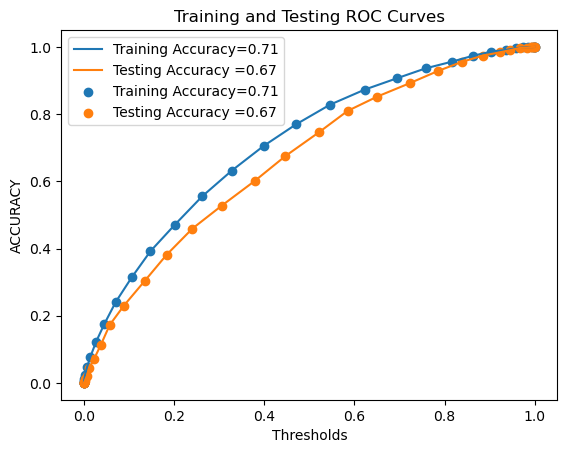

In [40]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix

train_fpr,train_tpr,thresholds=roc_curve(y_train,clf.predict_proba(x_train_transformed)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test_transformed)[:,1])

import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

## Confusion Matrix and Classification Report for both Training and Testing Samples

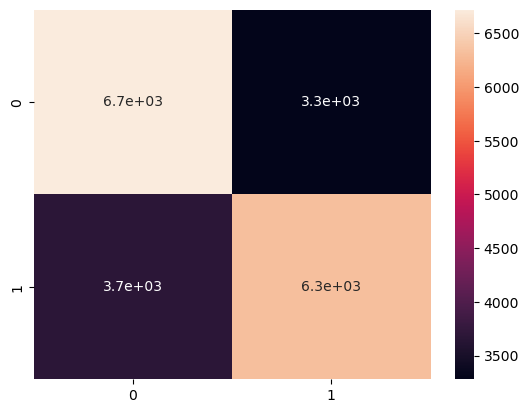

In [41]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train_transformed)),annot=True)
plt.show()

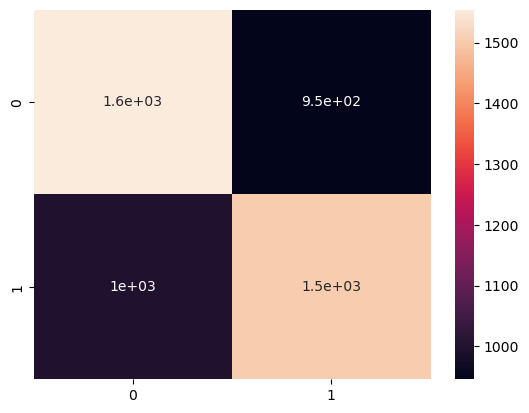

In [42]:
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_transformed)),annot=True)
plt.show()

In [43]:
print(classification_report(y_train,clf.predict(x_train_transformed)))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     10000
           1       0.66      0.63      0.64     10000

    accuracy                           0.65     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.65      0.65      0.65     20000



In [44]:
print(classification_report(y_test,clf.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      2500
           1       0.61      0.60      0.61      2500

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000

